# Практическая работа №7. Гомологичное моделирование комплекса белка с лигандом

In [15]:
! cd /tmp/ ; wget https://salilab.org/modeller/10.1/modeller_10.1-1_amd64.deb
! env KEY_MODELLER="MODELIRANJE" dpkg -i /tmp/modeller_10.1-1_amd64.deb

--2025-10-22 10:26:10--  https://salilab.org/modeller/10.1/modeller_10.1-1_amd64.deb
Resolving salilab.org (salilab.org)... 169.230.79.19
Connecting to salilab.org (salilab.org)|169.230.79.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14404568 (14M) [application/vnd.debian.binary-package]
Saving to: ‘modeller_10.1-1_amd64.deb.1’

modeller_10.1-1_amd 100%[===================>]  13.74M  49.4MB/s    in 0.3s    

2025-10-22 10:26:10 (49.4 MB/s) - ‘modeller_10.1-1_amd64.deb.1’ saved [14404568/14404568]

(Reading database ... 128789 files and directories currently installed.)
Preparing to unpack /tmp/modeller_10.1-1_amd64.deb ...
Unpacking modeller (10.1-1) over (10.1-1) ...
^C


In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
! echo -e "install_dir = r'/usr/lib/modeller10.1'\nlicense = 'MODELIRANJE'" > /usr/lib/modeller10.1/modlib/modeller/config.py

In [2]:
!pip install py3Dmol

In [3]:
import py3Dmol

In [4]:
import sys
sys.path.append('/usr/lib/python3.9/dist-packages')

In [5]:
from  modeller import *

In [6]:
!   pip install nglview

In [7]:
import sys
import modeller
import _modeller
import modeller.automodel
import nglview
import ipywidgets

In [16]:
env=modeller.environ()
env.io.hetatm=True

environ____W> The class 'environ' is deprecated; use 'Environ' instead


In [ ]:
!wget https://rest.uniprot.org/uniprotkb/P37715.fasta


--2025-10-22 10:21:17--  https://rest.uniprot.org/uniprotkb/P37715.fasta
Resolving rest.uniprot.org (rest.uniprot.org)... 193.62.193.81
Connecting to rest.uniprot.org (rest.uniprot.org)|193.62.193.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104 [text/plain]
Saving to: ‘P37715.fasta’

P37715.fasta        100%[===================>]     104  --.-KB/s    in 0s      

2025-10-22 10:21:17 (3.32 MB/s) - ‘P37715.fasta’ saved [104/104]



In [17]:
alignm=modeller.alignment(env)
#и добавим последовательность и структуру
alignm.append(file='P37715.fasta', align_codes='all',alignment_format='FASTA')
## создадим модель
mdl = modeller.model(env, file='1lmp.pdb', model_segment=('FIRST:'+'A', 'LAST:'+'B'))
## и добавим в выравнивание
alignm.append_model(mdl, atom_files='1lmp.pdb', align_codes='1lmp')
## есть смысл поправить идентификаторы
alignm[0].code = 'P37715'  # Целевая последовательность
alignm[1].code = '1lmp'    # Структура-образец
alignm.salign()
alignm.write(file='all_in_one.ali', alignment_format='PIR')

alignment__W> The class 'alignment' is deprecated; use 'Alignment' instead
model______W> The class 'model' is deprecated; use 'Model' instead
read_pd_459W> Residue type  NDG not recognized. 'AutoModel' model building
              will treat this residue as a rigid body.
              To use real parameters, add the residue type to ${LIB}/restyp.lib,
              its topology to ${LIB}/top_*.lib, and suitable forcefield
              parameters to ${LIB}/par.lib.
read_pd_459W> Residue type  NAG not recognized. 'AutoModel' model building
              will treat this residue as a rigid body.
              To use real parameters, add the residue type to ${LIB}/restyp.lib,
              its topology to ${LIB}/top_*.lib, and suitable forcefield
              parameters to ${LIB}/par.lib.

SALIGN_____> adding the next group to the alignment; iteration    1


In [18]:
! cat all_in_one.ali


>P1;P37715
sequence::: :: :::-1.00:-1.00
SGPVPSGCLRCICVVESGXRMPNPV--------------------------------------------------
----------------------------------------------------------*

>P1;1lmp
structureX:1lmp.pdb:1:A:+132:B:MOL_ID  1; MOLECULE  LYSOZYME; CHAIN  A; SYNONYM  MUCOPEPTIDE N-ACETYLMURAMYLHYDROLASE; EC  3.2.1.17:MOL_ID  1; ORGANISM_SCIENTIFIC  ONCORHYNCHUS MYKISS; ORGANISM_COMMON  RAINBOW TROUT; ORGANISM_TAXID  8022; ORGAN  KIDNEY: 2.00: 0.16
KVYDRCELARALKASGMDGYAGNSLPNWVCLSKWESSYNTQATNRNTDGSTDYGIFQINSRYWCDDGRTPGAKNV
CGIRCSQLLTDDLTVAIRCAKRVVLDPNGIGAWVAWRLHCQNQDLRSYVAGCGV/...*


Видим, что скачанная последовательность гораздо короче, чем 1lmp

In [ ]:
!wget https://rest.uniprot.org/uniprotkb/P85045.fasta

--2025-10-22 10:21:53--  https://rest.uniprot.org/uniprotkb/P85045.fasta
Resolving rest.uniprot.org (rest.uniprot.org)... 193.62.193.81
Connecting to rest.uniprot.org (rest.uniprot.org)|193.62.193.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240 [text/plain]
Saving to: ‘P85045.fasta’

P85045.fasta        100%[===================>]     240  --.-KB/s    in 0s      

2025-10-22 10:21:53 (97.4 MB/s) - ‘P85045.fasta’ saved [240/240]



In [43]:
alignm=modeller.alignment(env)
#и добавим последовательность и структуру
alignm.append(file='P85045.fasta', align_codes='all',alignment_format='FASTA')
## создадим модель
mdl = modeller.model(env, file='1lmp.pdb', model_segment=('FIRST:'+'A', 'LAST:'+'B'))
## и добавим в выравнивание
alignm.append_model(mdl, atom_files='1lmp.pdb', align_codes='1lmp')
## есть смысл поправить идентификаторы
alignm[0].code = 'P85045'  # Целевая последовательность
alignm[1].code = '1lmp'    # Структура-образец
alignm.salign()
alignm.write(file='all_in_one.ali', alignment_format='PIR')

alignment__W> The class 'alignment' is deprecated; use 'Alignment' instead
model______W> The class 'model' is deprecated; use 'Model' instead

SALIGN_____> adding the next group to the alignment; iteration    1


In [44]:
! cat all_in_one.ali


>P1;P85045
sequence::: :: :::-1.00:-1.00
SGKYISWEDSCSYLQLQKYERCELAKALKKGGLADFKGYSLENWICTAFHESGYNTASTNYNPPDKSTDYGIFQI
NSRWWCNDYKTPRSKNTCNIDCKVLLGDDISPAIKCAKRVVSDPNGMGAWVAWKKYCKGKNLSQWTQGCKL----*

>P1;1lmp
structureX:1lmp.pdb:1:A:+132:B:MOL_ID  1; MOLECULE  LYSOZYME; CHAIN  A; SYNONYM  MUCOPEPTIDE N-ACETYLMURAMYLHYDROLASE; EC  3.2.1.17:MOL_ID  1; ORGANISM_SCIENTIFIC  ONCORHYNCHUS MYKISS; ORGANISM_COMMON  RAINBOW TROUT; ORGANISM_TAXID  8022; ORGAN  KIDNEY: 2.00: 0.16
----------------KVYDRCELARALKASGMDGYAGNSLPNWVCLSKWESSYNTQATNRNT-DGSTDYGIFQI
NSRYWCDDGRTPGAKNVCGIRCSQLLTDDLTVAIRCAKRVVLDPNGIGAWVAWRLHCQNQDLRSYVAGCGV/...*


In [45]:
# Построим модель:
## Выбираем объект для моделирования
s = alignm[0]
pdb = alignm[1]
print(s.code, pdb.code)
## Создаем объект automodel
a = modeller.automodel.automodel(env,
                                alnfile='all_in_one.ali',
                                knowns=pdb.code,
                                sequence=s.code)
a.name = 'mod' + s.code
a.starting_model = 1
a.ending_model = 2
a.make()

P85045 1lmp
automodel__W> The class 'automodel' is deprecated; use 'AutoModel' instead
AutoModel__W> Topology and/or parameter libraries already in memory. These will
                be used instead of the AutoModel defaults. If this is not what you
                want, clear them before creating the AutoModel object with
                env.libs.topology.clear() and env.libs.parameters.clear()
fndatmi_285W> Only      129 residues out of      132 contain atoms of type  CA
              (This is usually caused by non-standard residues, such
              as ligands, or by PDB files with missing atoms.)
fndatmi_285W> Only      129 residues out of      132 contain atoms of type  CA
              (This is usually caused by non-standard residues, such
              as ligands, or by PDB files with missing atoms.)

check_ali___> Checking the sequence-structure alignment. 

Implied intrachain target CA(i)-CA(i+1) distances longer than  8.0 angstroms:

ALN_POS  TMPL  RID1  RID2  NAM1  NAM2   

In [46]:
view = py3Dmol.view()
# Добавление PDB файла
view.addModel(open('P85045.B99990001.pdb', 'r').read(), 'pdb')

# Настройка стиля отображения
view.setStyle({'cartoon': {'color': 'spectrum'}})
view.setStyle({'hetflag': True}, {'stick': {'colorscheme': 'greenCarbon'}})

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Скриншот на случай неоткрытия в ноутбуке:

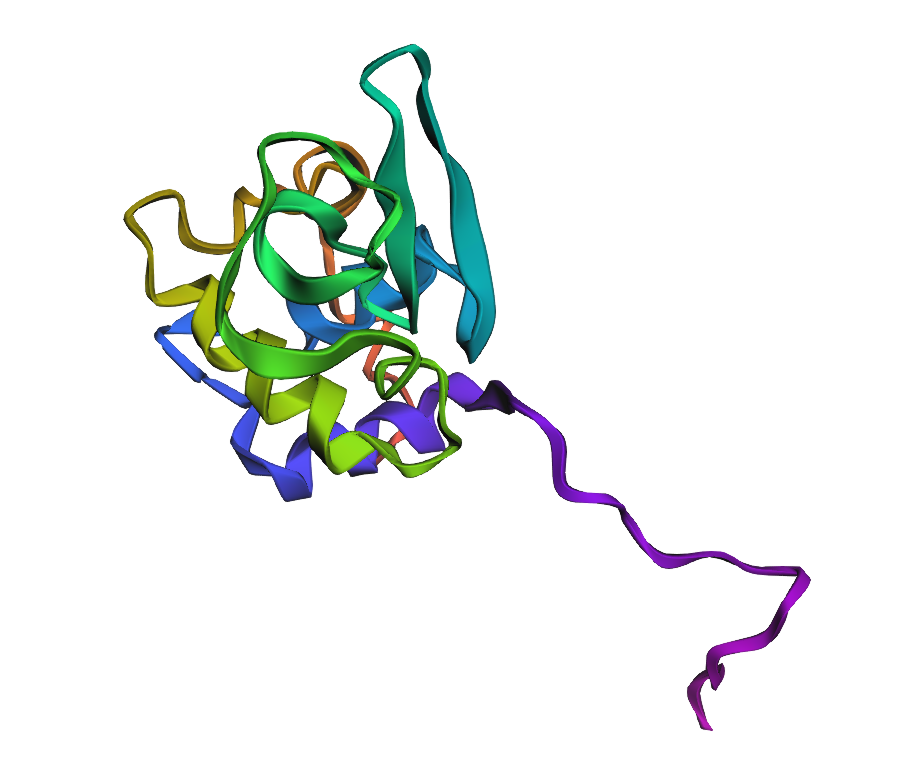

а лиганда и нет...

In [47]:
resi = ''
for i in alignm[0].residues:
    resi += i.code
resi += '...'

alignm.append_sequence(resi)

In [48]:
s = alignm[2]
pdb = alignm[1]
s.code = 'LYS_BUFGA'

alignm.salign()
alignm.write(file='all_in_one.ali', alignment_format='PIR')

print(s.code, pdb.code)

alignm.salign()
alignm.write(file='all_in_one.ali', alignment_format='PIR')

a = modeller.automodel.automodel(env, alnfile='all_in_one.ali', knowns= pdb.code , sequence = s.code )

a.name='mod1'+s.code
a.starting_model = 1
a.ending_model = 2
a.make()


SALIGN_____> adding the next group to the alignment; iteration    1

SALIGN_____> adding the next group to the alignment; iteration    2
LYS_BUFGA 1lmp

SALIGN_____> adding the next group to the alignment; iteration    1

SALIGN_____> adding the next group to the alignment; iteration    2
automodel__W> The class 'automodel' is deprecated; use 'AutoModel' instead
AutoModel__W> Topology and/or parameter libraries already in memory. These will
                be used instead of the AutoModel defaults. If this is not what you
                want, clear them before creating the AutoModel object with
                env.libs.topology.clear() and env.libs.parameters.clear()
fndatmi_285W> Only      129 residues out of      132 contain atoms of type  CA
              (This is usually caused by non-standard residues, such
              as ligands, or by PDB files with missing atoms.)
fndatmi_285W> Only      129 residues out of      132 contain atoms of type  CA
              (This is usually c

In [49]:
view = py3Dmol.view()
# Добавление PDB файла
view.addModel(open('LYS_BUFGA.B99990001.pdb', 'r').read(), 'pdb')

# Настройка стиля отображения
view.setStyle({'cartoon': {'color': 'spectrum'}})
view.setStyle({'hetflag': True}, {'stick': {'colorscheme': 'greenCarbon'}})

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Скриншот на случай не открытия в ноутбуке:

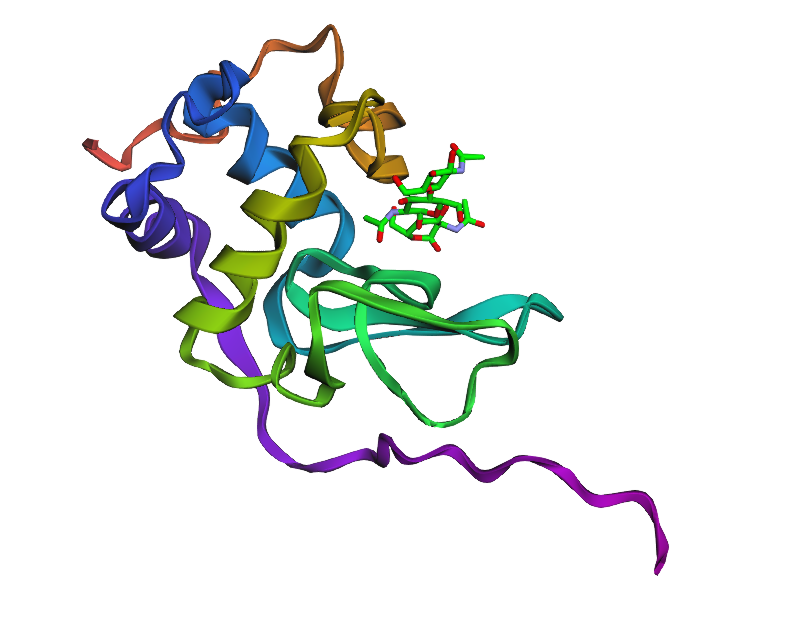

In [52]:
seq = "A" * len(alignm[0].residues)
seq += '...'

alignm.append_sequence(seq)

In [53]:
s = alignm[3]
pdb = alignm[1]
s.code = 'LYS_BUFGA2'

print(s.code, pdb.code)

alignm.salign()
alignm.write(file='all_in_one.ali', alignment_format='PIR')

a = modeller.automodel.AutoModel(env, alnfile='all_in_one.ali', knowns=pdb.code, sequence=s.code)
a.name = 'mod2' + s.code
a.starting_model = 1
a.ending_model = 2
a.make()



LYS_BUFGA2 1lmp

SALIGN_____> adding the next group to the alignment; iteration    1

SALIGN_____> adding the next group to the alignment; iteration    2

SALIGN_____> adding the next group to the alignment; iteration    3
AutoModel__W> Topology and/or parameter libraries already in memory. These will
                be used instead of the AutoModel defaults. If this is not what you
                want, clear them before creating the AutoModel object with
                env.libs.topology.clear() and env.libs.parameters.clear()
fndatmi_285W> Only      129 residues out of      132 contain atoms of type  CA
              (This is usually caused by non-standard residues, such
              as ligands, or by PDB files with missing atoms.)
fndatmi_285W> Only      129 residues out of      132 contain atoms of type  CA
              (This is usually caused by non-standard residues, such
              as ligands, or by PDB files with missing atoms.)

check_ali___> Checking the sequence-struct

In [54]:
view = py3Dmol.view()
# Добавление PDB файла
view.addModel(open('LYS_BUFGA2.B99990001.pdb', 'r').read(), 'pdb')

# Настройка стиля отображения
view.setStyle({'cartoon': {'color': 'spectrum'}})
view.setStyle({'hetflag': True}, {'stick': {'colorscheme': 'greenCarbon'}})

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Скриншот на случай не открытия в ноутбуке:

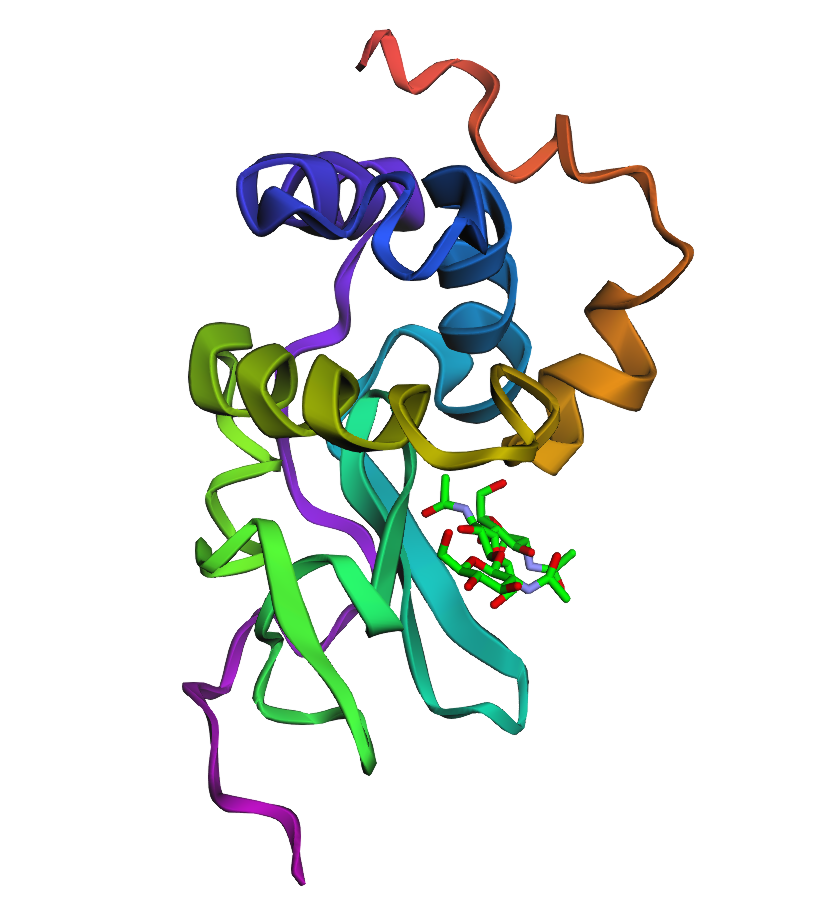

In [55]:
from modeller.scripts import complete_pdb
from modeller import selection

def get_dope_score(model_file):
    env.libs.topology.read(file='$(LIB)/top_heav.lib')
    env.libs.parameters.read(file='$(LIB)/par.lib')
    mdl = complete_pdb(env, model_file)
    s = selection(mdl)
    return s.assess_dope()

native_score = get_dope_score('LYS_BUFGA.B99990001.pdb')
ala_score = get_dope_score('LYS_BUFGA2.B99990001.pdb')

print(f"Нативная последовательность: {native_score:.2f}")
print(f"Аланиновый мутант: {ala_score:.2f}")
print(f"Разница: {ala_score - native_score:.2f}")

if native_score < ala_score:
    print("Нативная модель имеет лучшее значение")
else:
    print("Аланиновый мутант имеет большее значение")

read_to_681_> topology.submodel read from topology file:        3
readlinef__W> File: LYS_BUFGA.B99990001.pdb, Line: 6
              Modeller will only read the first 80 characters of this line.


getf_______W> RTF restraint not found in the atoms list:
              residue type, indices:    10   146
              atom names           : C     +N
              atom indices         :  1164     0

getf_______W> RTF restraint not found in the atoms list:
              residue type, indices:    10   146
              atom names           : C     CA    +N    O
              atom indices         :  1164  1159     0  1165
selection__W> The class 'selection' is deprecated; use 'Selection' instead
>> Model assessment by DOPE potential
iatmcls_286W> MODEL atom not classified:  LEU:OXT  LEU
preppdf_453W> No fixed restraints selected; there may be some dynamic ones.
preppdf_454W> Restraints file was probably not read; use restraints.append().


>> ENERGY; Differences between the model's features a

## AlphaFold

In [30]:
!pip install colabdesign

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.1/374.1 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.6 MB/s eta 0:00:00


In [31]:
import jax
import jax.numpy as jnp
from colabdesign.af.alphafold.common import residue_constants
from colabdesign import clear_mem, mk_afdesign_model


In [33]:
#! wget http://www.pdb.org/pdb/files/1l2y.pdb
! mkdir -p  /opt/alphadesign/
! curl -fsSL https://storage.googleapis.com/alphafold/alphafold_params_2022-12-06.tar | tar x -C /opt/alphadesign/


In [34]:
def rg_loss(inputs, outputs):
  positions = outputs["structure_module"]["final_atom_positions"]
  ca = positions[:,residue_constants.atom_order["CA"]]
  center = ca.mean(0)
  rg = jnp.sqrt(jnp.square(ca - center).sum(-1).mean() + 1e-8)
  rg_th = 2.38 * ca.shape[0] ** 0.365
  rg = jax.nn.elu(rg - rg_th)
  return {"rg":rg}


In [35]:
clear_mem()
af_model = mk_afdesign_model(protocol="partial", data_dir='/opt/alphadesign/',
                      loss_callback=rg_loss, # Это наша функция
                      use_templates=False)


In [36]:
af_model.opt["weights"]["rg"] = 0.1


In [37]:
af_model.prep_inputs(pdb_filename="/content/1L2Y.pdb",
          chain="A",
          pos="1-7,15-19",  	 # Позиции, которые  мы хотим оставить неизменными
          length=30)          # Новый белок будет 30 аминокислот
af_model.rewire(loops=[15]) # тут мы зададим размер петли между участками


In [38]:
af_model.restart(mode=["soft","gumbel","wildtype"])
af_model.design_3stage(soft_iters=100, temp_iters=100, hard_iters=10)


Stage 1: running (logits → soft)
1 models [3] recycles 0 hard 0 soft 0.01 temp 1 seqid 1 loss 8.45 con 4.18 dgram_cce 3.94 plddt 0.76 ptm 0.28 rmsd 8.78 rg 3.31
2 models [3] recycles 0 hard 0 soft 0.02 temp 1 seqid 1 loss 5.87 con 3.20 dgram_cce 2.66 plddt 0.82 ptm 0.36 rmsd 4.02 rg 0.17
3 models [0] recycles 0 hard 0 soft 0.03 temp 1 seqid 1 loss 7.90 con 4.42 dgram_cce 3.15 plddt 0.64 ptm 0.25 rmsd 8.95 rg 3.43
4 models [0] recycles 0 hard 0 soft 0.04 temp 1 seqid 1 loss 6.87 con 3.98 dgram_cce 2.63 plddt 0.56 ptm 0.22 rmsd 4.54 rg 2.57
5 models [4] recycles 0 hard 0 soft 0.05 temp 1 seqid 1 loss 6.58 con 3.87 dgram_cce 2.46 plddt 0.57 ptm 0.20 rmsd 2.73 rg 2.52
6 models [3] recycles 0 hard 0 soft 0.06 temp 1 seqid 1 loss 6.43 con 3.75 dgram_cce 2.50 plddt 0.61 ptm 0.21 rmsd 2.23 rg 1.75
7 models [0] recycles 0 hard 0 soft 0.07 temp 1 seqid 1 loss 6.37 con 3.75 dgram_cce 2.43 plddt 0.60 ptm 0.24 rmsd 2.01 rg 1.90
8 models [2] recycles 0 hard 0 soft 0.08 temp 1 seqid 1 loss 6.36 con 3

In [39]:
af_model.save_pdb('afdes.pdb')
af_model.plot_pdb()
af_model.get_seqs()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

['NEYKQWCETHKWNINTDRRCRLGMDPPASL']

In [40]:
view = py3Dmol.view()
# Добавление PDB файла
view.addModel(open('afdes.pdb', 'r').read(), 'pdb')

# Настройка стиля отображения
view.setStyle({'cartoon': {'color': 'spectrum'}})
view.setStyle({'hetflag': True}, {'stick': {'colorscheme': 'greenCarbon'}})

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Скриншот на случай неоткрытия в ноутбуке:

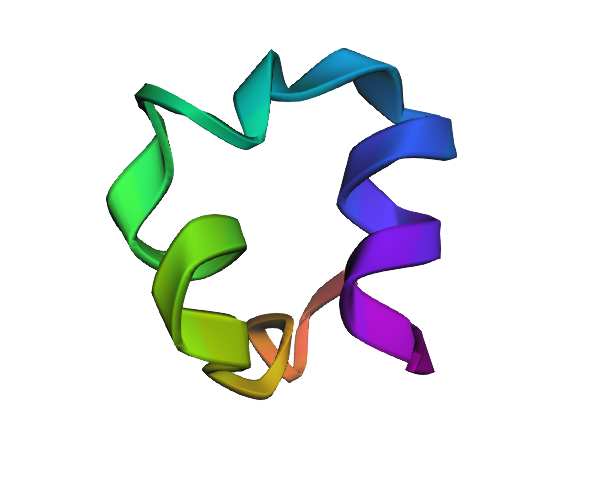

In [56]:
af_model.get_seqs()

['NEYKQWCETHKWNINTDRRCRLGMDPPASL']

Последовательность 1L2Y: NLYIQWLKDGGPSSGRPPPS

Последовательность после AlphaFold: NEYKQWCETHKWNINTDRRCRLGMDPPASL

Заметны сильные различия в последовательностях структур, накладываются не очень хорошо.

In [67]:
with open("afdes.pdb", 'r') as f:
    mutant_data = f.read()

with open("1L2Y.pdb", 'r') as f:
    wt_data = f.read()

view = py3Dmol.view(width=800, height=600, viewergrid=(1,2))

view.addModel(mutant_data, 'pdb', viewer=(0,0))
view.setStyle({'model': -1}, {'cartoon': {'color': 'pink'}}, viewer=(0,0))

view.addModel(wt_data, 'pdb', viewer=(0,1))
view.setStyle({'model': -1}, {'cartoon': {'color': 'cyan'}}, viewer=(0,1))


view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Скриншот на случай неоткрытия в ноутбуке:
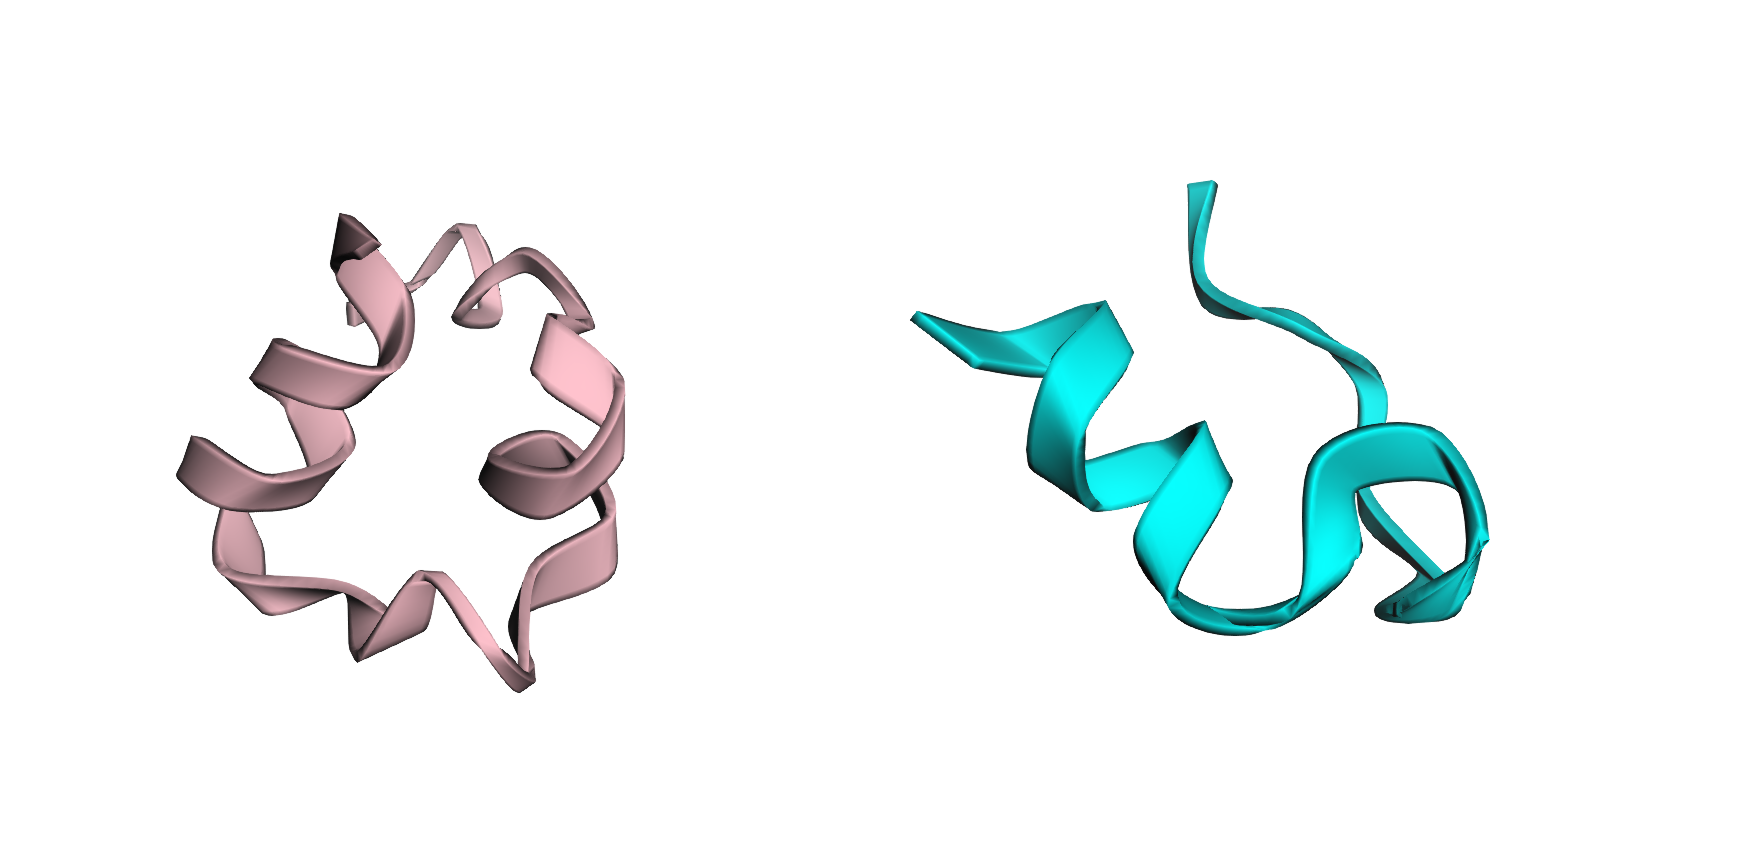

